In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_isp_irc = pd.read_excel('Data/vt_isp_irc.xlsx')
df_isp_task = pd.read_excel('Data/vt_isp_task_mhrs.xlsx')
df_isp_material = pd.read_excel('Data/vt_isp_material_consumption_pricing.xlsx')

df_isq_irc = pd.read_excel('Data/vt_isq_irc.xlsx')
df_isq_task = pd.read_excel('Data/vt_isq_task_mhrs.xlsx')
df_isq_material = pd.read_excel('Data/vt_isq_material_consumption_pricing.xlsx')

df_iux_irc = pd.read_excel('Data/vt_iux_irc.xlsx')
df_iux_task = pd.read_excel('Data/vt_iux_task_mhrs.xlsx')
df_iux_material = pd.read_excel('Data/vt_iux_material_consumption_pricing.xlsx')

# Man Hours analysis

In [3]:
df = pd.read_excel('FinalResults/flight_maintenance_description_result.xlsx')

In [4]:
import numpy as np
import ast

def val_counter(x):
    x = ast.literal_eval(x)
    counts = [item.split('/')[1] for item in x]
    
    return np.unique(np.array(counts), return_counts=True)[1].tolist()


df['frequency_count'] = df['logItem'].apply(val_counter)
df['frequency'] = df['frequency_count'].apply(lambda x: np.sum(x)/3)
df['avg_man_hrs'] = df.apply(lambda x: np.mean(ast.literal_eval(x['man_hrs'])) * float(x['frequency']), axis=1)
df['probability'] = df['frequency_count'].apply(lambda x: len(x)/3)

In [5]:
df = df[['sourceTask', 'logItem', 'description', 'frequency_count', 'man_hrs', 'frequency', 'avg_man_hrs', 'probability']]

In [6]:
logItemsInGroups = []

for i in df['logItem'].values:
    for j in ast.literal_eval(i):
        logItemsInGroups.append(j)

In [7]:
task = pd.read_csv('task.csv')
task.head()

,Log Item #,Source Task/Discrep. #,Description,Actual Man Hrs.
0,HMV23/000059/0923/1,AIRCRAFT ARRIVAL INSPECTION,1. DURING INSPECTION OBERVED LH WING SLATE #01...,4.0
1,HMV23/000059/0923/2,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL INSPECTION CHECK FOUND FAILURE ...,4.0
2,HMV23/000059/0923/3,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL INSPECTION FOUND STATIC DISCHAR...,5.0
3,HMV23/000059/0923/4,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL CHECK FOUND SERVICE LIGHT LAMP ...,3.0
4,HMV23/000059/0923/5,AIRCRAFT ARRIVAL INSPECTION,"DURING ARRIVAL INSPECTION , OBSERVED FOLLOWINS...",0.0


In [8]:
df_single_obs = list(set(task['Log Item #']).difference(set(logItemsInGroups)))
df_single_obs = task[task['Log Item #'].isin(df_single_obs)].copy()
df_single_obs.rename(columns={'Log Item #': 'logItem',
                              "Source Task/Discrep. #": "sourceTask",
                              'Description': 'description',
                              'Actual Man Hrs.': 'man_hrs'}, inplace=True)
df_single_obs.reset_index(drop=True, inplace=True)
df_single_obs = df_single_obs[['sourceTask', 'logItem', 'description', 'man_hrs']]
df_single_obs.head()

,sourceTask,logItem,description,man_hrs
0,AIRCRAFT ARRIVAL INSPECTION,HMV23/000059/0923/1,1. DURING INSPECTION OBERVED LH WING SLATE #01...,4.0
1,AIRCRAFT ARRIVAL INSPECTION,HMV23/000059/0923/2,DURING ARRIVAL INSPECTION CHECK FOUND FAILURE ...,4.0
2,215222-01-1 (LH),HMV23/000059/0923/13,DURING OPPORTUNITY INSPECTION FOUND LH ACM ANT...,2.5
3,AWR23/002877/0923,HMV23/000059/0923/14,TO FACILITATE THE HFEC INSPECTION ON THE DENT ...,6.0
4,AIRCRAFT ARRIVAL INSPECTION,HMV23/000059/0923/18,REFER CABIN DEFECT LOG DEFERRED ITEM #14:-\nAF...,1.2


In [9]:
df_single_obs['frequency_count'] = [[1]] * len(df_single_obs)
df_single_obs['frequency'] = [1/3] * len(df_single_obs)
df_single_obs['avg_man_hrs'] = df_single_obs['man_hrs'] * df_single_obs['frequency']
df_single_obs['probability'] = [1/3] * len(df_single_obs)
df_single_obs = df_single_obs[['sourceTask', 'logItem', 'description', 'frequency_count', 'man_hrs', 'frequency', 'avg_man_hrs', 'probability']]
df_single_obs.head(2)

,sourceTask,logItem,description,frequency_count,man_hrs,frequency,avg_man_hrs,probability
0,AIRCRAFT ARRIVAL INSPECTION,HMV23/000059/0923/1,1. DURING INSPECTION OBERVED LH WING SLATE #01...,[1],4.0,0.333333,1.333333,0.333333
1,AIRCRAFT ARRIVAL INSPECTION,HMV23/000059/0923/2,DURING ARRIVAL INSPECTION CHECK FOUND FAILURE ...,[1],4.0,0.333333,1.333333,0.333333


In [10]:
df = pd.concat([df, df_single_obs], ignore_index=True)
df.head()

,sourceTask,logItem,description,frequency_count,man_hrs,frequency,avg_man_hrs,probability
0,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/17', 'HMV23/000059/0923/3']",['DURING ARRIVAL INSPECTION FOUND STATIC DISCH...,"[1, 1]","[7.0, 5.0]",0.666667,4.000000,0.666667
1,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000059/0923/4', 'HMV23/000055/0923/21']",['DURING ARRIVAL CHECK FOUND SERVICE LIGHT LAM...,"[1, 1]","[3.0, 3.0]",0.666667,2.000000,0.666667
2,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000059/0923/5', 'HMV23/000043/0823/12'...","['DURING ARRIVAL INSPECTION , OBSERVED FOLLOWI...","[1, 2, 1]","[0.0, 2.0, 2.0, 3.0]",1.333333,2.333333,1.000000
3,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/11', 'HMV23/000059/0923/6']",['DURING INSPECTION FOUND FOLLOWING FORWARD CA...,"[1, 1]","[15.0, 15.0]",0.666667,10.000000,0.666667
4,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/12', 'HMV23/000059/0923/7']",['DURING INSPECTION FOUND FOLLOWING AFT CARGO ...,"[1, 1]","[20.0, 20.0]",0.666667,13.333333,0.666667


In [11]:
df.to_excel('FinalResults/man_hrs_prob.xlsx', index=False)

# Spare Parts analysis

In [12]:
df_isp_material.rename(columns={'Task #':'Log Item #'}, inplace=True)
df_isq_material.rename(columns={'Task #':'Log Item #'}, inplace=True)
df_iux_material.rename(columns={'Task #':'Log Item #'}, inplace=True)

In [13]:
df_material = pd.concat([df_isp_material[['Log Item #', 'Part Description', 'Used Qty']], 
                        df_isq_material[['Log Item #', 'Part Description', 'Used Qty']], 
                        df_iux_material[['Log Item #', 'Part Description', 'Used Qty']]], 
                        ignore_index=True, axis=0)

In [14]:
df_spare_parts = pd.DataFrame(columns=['logItem', 'spareParts', 'usedQty'])
for i in task['Log Item #']:
    temp = df_material[df_material['Log Item #'] == i]
    if temp.shape[0] > 0:
        # spare_counts = np.unique(temp['Part Description'].values, return_counts=True)
        # spare_counts = dict(zip(spare_counts[0].tolist(), spare_counts[1].tolist()))
        spare_counts = list(df_material[df_material['Log Item #'] == i][['Part Description', 'Used Qty']].groupby('Part Description').sum().to_dict().values())[0]
        new_row = {'logItem':i, 
                   'spareParts': spare_counts, 
                   'usedQty':temp['Used Qty'].sum()}
        df_spare_parts = pd.concat([df_spare_parts, pd.DataFrame([new_row])], ignore_index=True)
    else:
        new_row = {'logItem':i, 
                   'spareParts':0, 
                   'usedQty':0}
        df_spare_parts = pd.concat([df_spare_parts, pd.DataFrame([new_row])], ignore_index=True)
df_spare_parts

,logItem,spareParts,usedQty
0,HMV23/000059/0923/1,"{'BOLT': 1.0, 'ELBOW': 6.0, 'PLATE': 1.0, 'SEA...",12.0
1,HMV23/000059/0923/2,0,0.0
2,HMV23/000059/0923/3,{'DISCHRGR': 5.0},5.0
3,HMV23/000059/0923/4,"{'LAMP': 1.0, 'LAMP-GE S-8 28V 643W SC BAYONET...",2.0
4,HMV23/000059/0923/5,"{'ELBOW': 2.0, 'SEAL': 2.0}",4.0
...,...,...,...
57,HMV23/000043/0823/11,0,0.0
58,HMV23/000043/0823/12,{'SEAL': 1.0},1.0
59,HMV23/000043/0823/13,0,0.0
60,HMV23/000043/0823/14,0,0.0


In [15]:
task.rename(columns={'Log Item #': 'logItem', 
                     'Source Task/Discrep. #':'soureceTask',
                     'Description': 'description',
                     'Actual Man Hrs.': 'man_hrs'}, inplace=True)

In [16]:
df_spare_parts = pd.merge(task, df_spare_parts, on='logItem', how='inner')
df_spare_parts.head(2)   

,logItem,soureceTask,description,man_hrs,spareParts,usedQty
0,HMV23/000059/0923/1,AIRCRAFT ARRIVAL INSPECTION,1. DURING INSPECTION OBERVED LH WING SLATE #01...,4.0,"{'BOLT': 1.0, 'ELBOW': 6.0, 'PLATE': 1.0, 'SEA...",12.0
1,HMV23/000059/0923/2,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL INSPECTION CHECK FOUND FAILURE ...,4.0,0,0.0


In [17]:
df_spare_parts.tail()

,logItem,soureceTask,description,man_hrs,spareParts,usedQty
57,HMV23/000043/0823/11,AIRCRAFT ARRIVAL INSPECTION,OPERATIONAL TEST OF SLAT#2 (LH & RH) WING TO B...,1.1,0,0.0
58,HMV23/000043/0823/12,AIRCRAFT ARRIVAL INSPECTION,WHILE ARRIVAL INSPECTION OBSERVED RH WING SLAT...,2.0,{'SEAL': 1.0},1.0
59,HMV23/000043/0823/13,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL CHECK OBSERVED ON VERTICAL STAB...,3.0,0,0.0
60,HMV23/000043/0823/14,353000-07-1,DURING DETAILED INSPECTION OF PORTABLE OXYGEN ...,1.0,0,0.0
61,HMV23/000043/0823/15,AIRCRAFT ARRIVAL INSPECTION,"WRT CDLB ENTRY BOOK#11729,S/N:002 COMPARTMENT ...",1.1,0,0.0


In [18]:
df_spare_parts.to_excel('FinalResults/spare_parts.xlsx', index=False)

In [19]:
aai_spareParts = dict()
for i in df_spare_parts.groupby(by='soureceTask').get_group('AIRCRAFT ARRIVAL INSPECTION')['spareParts']:
    if isinstance(i, dict):
        for j in i:
            if j in aai_spareParts:
                aai_spareParts[j] += 1
            else:
                aai_spareParts[j] = 1

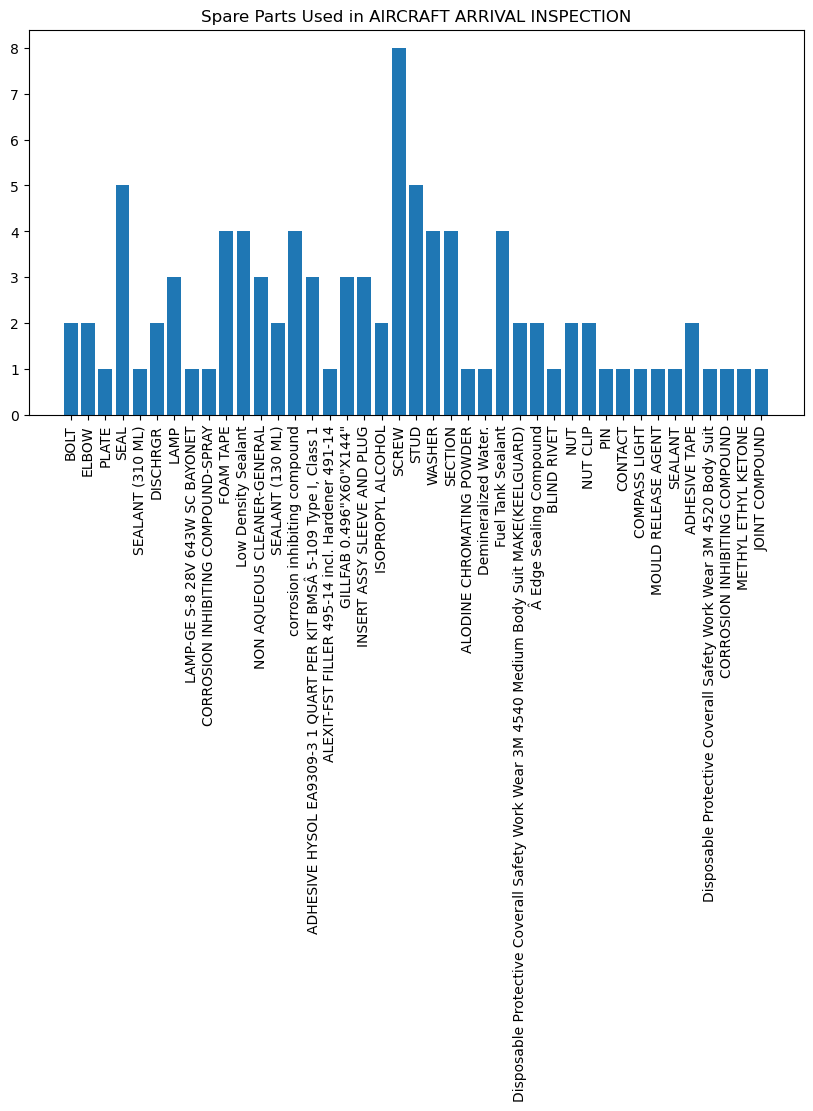

In [20]:
plt.figure(figsize=(10, 5))
plt.bar(aai_spareParts.keys(), aai_spareParts.values())
plt.xticks(rotation=90)
plt.title('Spare Parts Used in AIRCRAFT ARRIVAL INSPECTION')
plt.show()

In [21]:
df.head()

,sourceTask,logItem,description,frequency_count,man_hrs,frequency,avg_man_hrs,probability
0,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/17', 'HMV23/000059/0923/3']",['DURING ARRIVAL INSPECTION FOUND STATIC DISCH...,"[1, 1]","[7.0, 5.0]",0.666667,4.000000,0.666667
1,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000059/0923/4', 'HMV23/000055/0923/21']",['DURING ARRIVAL CHECK FOUND SERVICE LIGHT LAM...,"[1, 1]","[3.0, 3.0]",0.666667,2.000000,0.666667
2,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000059/0923/5', 'HMV23/000043/0823/12'...","['DURING ARRIVAL INSPECTION , OBSERVED FOLLOWI...","[1, 2, 1]","[0.0, 2.0, 2.0, 3.0]",1.333333,2.333333,1.000000
3,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/11', 'HMV23/000059/0923/6']",['DURING INSPECTION FOUND FOLLOWING FORWARD CA...,"[1, 1]","[15.0, 15.0]",0.666667,10.000000,0.666667
4,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/12', 'HMV23/000059/0923/7']",['DURING INSPECTION FOUND FOLLOWING AFT CARGO ...,"[1, 1]","[20.0, 20.0]",0.666667,13.333333,0.666667


In [22]:
df.tail(20)

,sourceTask,logItem,description,frequency_count,man_hrs,frequency,avg_man_hrs,probability
17,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000043/0823/9', 'HMV23/000043/0823/8']",['POST REPAIR INSTALLATION OF LH WING SLAT #2(...,[2],"[10.0, 5.0]",0.666667,5.000000,0.333333
18,AIRCRAFT ARRIVAL INSPECTION,HMV23/000059/0923/1,1. DURING INSPECTION OBERVED LH WING SLATE #01...,[1],4.0,0.333333,1.333333,0.333333
19,AIRCRAFT ARRIVAL INSPECTION,HMV23/000059/0923/2,DURING ARRIVAL INSPECTION CHECK FOUND FAILURE ...,[1],4.0,0.333333,1.333333,0.333333
20,215222-01-1 (LH),HMV23/000059/0923/13,DURING OPPORTUNITY INSPECTION FOUND LH ACM ANT...,[1],2.5,0.333333,0.833333,0.333333
21,AWR23/002877/0923,HMV23/000059/0923/14,TO FACILITATE THE HFEC INSPECTION ON THE DENT ...,[1],6.0,0.333333,2.000000,0.333333
22,AIRCRAFT ARRIVAL INSPECTION,HMV23/000059/0923/18,REFER CABIN DEFECT LOG DEFERRED ITEM #14:-\nAF...,[1],1.2,0.333333,0.400000,0.333333
23,AIRCRAFT ARRIVAL INSPECTION,HMV23/000059/0923/19,REFER ADD #1 \nPEN HOLDER P1,[1],0.75,0.333333,0.250000,0.333333
24,AIRCRAFT ARRIVAL INSPECTION,HMV23/000059/0923/20,ADD NO. 2 \nFOLLOWING PLACARDS ON ENGINE #1 RH...,[1],4.0,0.333333,1.333333,0.333333
25,AWR23/003125/0923,HMV23/000059/0923/21,TO FACILITATE LH FWD NOSE FUSELAGE DENT ASSESS...,[1],8.0,0.333333,2.666667,0.333333
26,AIRCRAFT ARRIVAL INSPECTION,HMV23/000055/0923/16,DURING ARRIVAL INSPECTION OBSERVED MECHANICAL ...,[1],4.0,0.333333,1.333333,0.333333


In [23]:
df_spare_parts.head(2)

,logItem,soureceTask,description,man_hrs,spareParts,usedQty
0,HMV23/000059/0923/1,AIRCRAFT ARRIVAL INSPECTION,1. DURING INSPECTION OBERVED LH WING SLATE #01...,4.0,"{'BOLT': 1.0, 'ELBOW': 6.0, 'PLATE': 1.0, 'SEA...",12.0
1,HMV23/000059/0923/2,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL INSPECTION CHECK FOUND FAILURE ...,4.0,0,0.0


In [24]:
df['logItem']

0       ['HMV23/000055/0923/17', 'HMV23/000059/0923/3']
1       ['HMV23/000059/0923/4', 'HMV23/000055/0923/21']
2     ['HMV23/000059/0923/5', 'HMV23/000043/0823/12'...
3       ['HMV23/000055/0923/11', 'HMV23/000059/0923/6']
4       ['HMV23/000055/0923/12', 'HMV23/000059/0923/7']
5     ['HMV23/000059/0923/8', 'HMV23/000055/0923/14'...
6      ['HMV23/000055/0923/22', 'HMV23/000059/0923/10']
7      ['HMV23/000055/0923/15', 'HMV23/000059/0923/11']
8      ['HMV23/000055/0923/24', 'HMV23/000059/0923/12']
9      ['HMV23/000059/0923/15', 'HMV23/000055/0923/10']
10     ['HMV23/000055/0923/23', 'HMV23/000059/0923/16']
11     ['HMV23/000059/0923/17', 'HMV23/000055/0923/25']
12    ['HMV23/000055/0923/8', 'HMV23/000055/0923/1',...
13    ['HMV23/000055/0923/4', 'HMV23/000055/0923/5',...
14     ['HMV23/000055/0923/19', 'HMV23/000055/0923/20']
15       ['HMV23/000043/0823/3', 'HMV23/000043/0823/5']
16      ['HMV23/000043/0823/7', 'HMV23/000043/0823/10']
17       ['HMV23/000043/0823/9', 'HMV23/000043/0

In [40]:
group_spare = []
for i in df['logItem']:
    groups = []
    if len(i)>20:
        i = ast.literal_eval(i)
        print(i)
        for j in i:
            groups.append(df_spare_parts[df_spare_parts['logItem'] == j]['spareParts'].values.tolist()[0])
    else:
        groups.append(df_spare_parts[df_spare_parts['logItem'] == i]['spareParts'].values.tolist()[0])
    group_spare.append(groups)
# print(group_spare)

['HMV23/000055/0923/17', 'HMV23/000059/0923/3']
['HMV23/000059/0923/4', 'HMV23/000055/0923/21']
['HMV23/000059/0923/5', 'HMV23/000043/0823/12', 'HMV23/000055/0923/2', 'HMV23/000055/0923/6']
['HMV23/000055/0923/11', 'HMV23/000059/0923/6']
['HMV23/000055/0923/12', 'HMV23/000059/0923/7']
['HMV23/000059/0923/8', 'HMV23/000055/0923/14', 'HMV23/000059/0923/9', 'HMV23/000055/0923/13']
['HMV23/000055/0923/22', 'HMV23/000059/0923/10']
['HMV23/000055/0923/15', 'HMV23/000059/0923/11']
['HMV23/000055/0923/24', 'HMV23/000059/0923/12']
['HMV23/000059/0923/15', 'HMV23/000055/0923/10']
['HMV23/000055/0923/23', 'HMV23/000059/0923/16']
['HMV23/000059/0923/17', 'HMV23/000055/0923/25']
['HMV23/000055/0923/8', 'HMV23/000055/0923/1', 'HMV23/000055/0923/9', 'HMV23/000055/0923/7']
['HMV23/000055/0923/4', 'HMV23/000055/0923/5', 'HMV23/000055/0923/3']
['HMV23/000055/0923/19', 'HMV23/000055/0923/20']
['HMV23/000043/0823/3', 'HMV23/000043/0823/5']
['HMV23/000043/0823/7', 'HMV23/000043/0823/10']
['HMV23/000043/082

In [41]:
group_spare

[[{'DISCHRGR': 9.0}, {'DISCHRGR': 5.0}],
 [{'LAMP': 1.0, 'LAMP-GE S-8 28V 643W SC BAYONET': 1.0}, {'LAMP': 3.0}],
 [{'ELBOW': 2.0, 'SEAL': 2.0},
  {'SEAL': 1.0},
  {'SCREW': 4.0, 'SEAL': 1.0},
  {'SEAL': 1.0}],
 [{'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ 5-109 Type I, Class 1': 1.0,
   'Disposable Protective Coverall Safety Work Wear 3M 4540 Medium Body Suit MAKE(KEELGUARD)': 14.0,
   'FOAM TAPE': 50.0,
   'GILLFAB 0.496"X60"X144"': 154.0,
   'INSERT ASSY SLEEVE AND PLUG': 320.0,
   'ISOPROPYL ALCOHOL': 10.0,
   'Low Density Sealant': 3.0,
   'SEALANT (130 ML)': 1.0,
   'corrosion inhibiting compound': 1.0,
   'Â Edge Sealing Compound': 1.0},
  {'CORROSION INHIBITING COMPOUND-SPRAY': 1.0,
   'FOAM TAPE': 15.0,
   'Low Density Sealant': 2.0,
   'NON AQUEOUS CLEANER-GENERAL': 1.0,
   'SEALANT (130 ML)': 1.0,
   'corrosion inhibiting compound': 1.0}],
 [{'BLIND RIVET': 8.0,
   'FOAM TAPE': 20.0,
   'Low Density Sealant': 4.0,
   'NUT': 4.0,
   'NUT CLIP': 40.0,
   'PIN': 4.0,
   'cor

In [42]:
df_spare_parts[df_spare_parts['logItem'] == 'HMV23/000059/0923/3']['spareParts'].values.tolist()[0]

{'DISCHRGR': 5.0}

In [54]:
def merge_list_of_dicts(list_of_dicts):
    merged_dict = {}

    for d in list_of_dicts:
        if isinstance(d, dict):
            for key, value in d.items():
                if key in merged_dict:
                    # If the key is present in both dictionaries, add the values
                    merged_dict[key] += value
                else:
                    # If the key is not present, simply add it to the merged dictionary
                    merged_dict[key] = value
        else:
            pass

    return merged_dict
        
def append_list_of_dicts(list_of_dicts):
    merged_dict = {}

    for d in list_of_dicts:
        if isinstance(d, dict):
            for key, value in d.items():
                if key in merged_dict:
                    # If the key is present in both dictionaries, add the values
                    merged_dict[key] += [value]
                else:
                    # If the key is not present, simply add it to the merged dictionary
                    merged_dict[key] = [value]
        else:
            pass

    return merged_dict

In [55]:
merge_list_of_dicts([{'DISCHRGR': 9.0}, {'DISCHRGR': 5.0}])

{'DISCHRGR': 14.0}

In [56]:
group_spare_agg = list(map(merge_list_of_dicts, group_spare))
group_spare_append = list(map(append_list_of_dicts, group_spare))
group_spare_agg

[{'DISCHRGR': 14.0},
 {'LAMP': 4.0, 'LAMP-GE S-8 28V 643W SC BAYONET': 1.0},
 {'ELBOW': 2.0, 'SEAL': 5.0, 'SCREW': 4.0},
 {'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ 5-109 Type I, Class 1': 1.0,
  'Disposable Protective Coverall Safety Work Wear 3M 4540 Medium Body Suit MAKE(KEELGUARD)': 14.0,
  'FOAM TAPE': 65.0,
  'GILLFAB 0.496"X60"X144"': 154.0,
  'INSERT ASSY SLEEVE AND PLUG': 320.0,
  'ISOPROPYL ALCOHOL': 10.0,
  'Low Density Sealant': 5.0,
  'SEALANT (130 ML)': 2.0,
  'corrosion inhibiting compound': 2.0,
  'Â Edge Sealing Compound': 1.0,
  'CORROSION INHIBITING COMPOUND-SPRAY': 1.0,
  'NON AQUEOUS CLEANER-GENERAL': 1.0},
 {'BLIND RIVET': 8.0,
  'FOAM TAPE': 55.0,
  'Low Density Sealant': 8.0,
  'NUT': 4.0,
  'NUT CLIP': 40.0,
  'PIN': 4.0,
  'corrosion inhibiting compound': 2.0,
  'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ 5-109 Type I, Class 1': 1.0,
  'ALEXIT-FST FILLER 495-14 incl. Hardener 491-14': 3.0,
  'GILLFAB 0.496"X60"X144"': 150.0,
  'INSERT ASSY SLEEVE AND PLU

In [57]:
df['spareParts_agg'] = group_spare_agg
df['spareParts_append'] = group_spare_append
df.head()

,sourceTask,logItem,description,frequency_count,man_hrs,frequency,avg_man_hrs,probability,spareParts_agg,spareParts_append
0,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/17', 'HMV23/000059/0923/3']",['DURING ARRIVAL INSPECTION FOUND STATIC DISCH...,"[1, 1]","[7.0, 5.0]",0.666667,4.000000,0.666667,{'DISCHRGR': 14.0},"{'DISCHRGR': [9.0, 5.0]}"
1,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000059/0923/4', 'HMV23/000055/0923/21']",['DURING ARRIVAL CHECK FOUND SERVICE LIGHT LAM...,"[1, 1]","[3.0, 3.0]",0.666667,2.000000,0.666667,"{'LAMP': 4.0, 'LAMP-GE S-8 28V 643W SC BAYONET...","{'LAMP': [1.0, 3.0], 'LAMP-GE S-8 28V 643W SC ..."
2,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000059/0923/5', 'HMV23/000043/0823/12'...","['DURING ARRIVAL INSPECTION , OBSERVED FOLLOWI...","[1, 2, 1]","[0.0, 2.0, 2.0, 3.0]",1.333333,2.333333,1.000000,"{'ELBOW': 2.0, 'SEAL': 5.0, 'SCREW': 4.0}","{'ELBOW': [2.0], 'SEAL': [2.0, 1.0, 1.0, 1.0],..."
3,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/11', 'HMV23/000059/0923/6']",['DURING INSPECTION FOUND FOLLOWING FORWARD CA...,"[1, 1]","[15.0, 15.0]",0.666667,10.000000,0.666667,{'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ...,{'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ...
4,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/12', 'HMV23/000059/0923/7']",['DURING INSPECTION FOUND FOLLOWING AFT CARGO ...,"[1, 1]","[20.0, 20.0]",0.666667,13.333333,0.666667,"{'BLIND RIVET': 8.0, 'FOAM TAPE': 55.0, 'Low D...","{'BLIND RIVET': [8.0], 'FOAM TAPE': [20.0, 35...."


In [58]:
df

,sourceTask,logItem,description,frequency_count,man_hrs,frequency,avg_man_hrs,probability,spareParts_agg,spareParts_append
0,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/17', 'HMV23/000059/0923/3']",['DURING ARRIVAL INSPECTION FOUND STATIC DISCH...,"[1, 1]","[7.0, 5.0]",0.666667,4.000000,0.666667,{'DISCHRGR': 14.0},"{'DISCHRGR': [9.0, 5.0]}"
1,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000059/0923/4', 'HMV23/000055/0923/21']",['DURING ARRIVAL CHECK FOUND SERVICE LIGHT LAM...,"[1, 1]","[3.0, 3.0]",0.666667,2.000000,0.666667,"{'LAMP': 4.0, 'LAMP-GE S-8 28V 643W SC BAYONET...","{'LAMP': [1.0, 3.0], 'LAMP-GE S-8 28V 643W SC ..."
2,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000059/0923/5', 'HMV23/000043/0823/12'...","['DURING ARRIVAL INSPECTION , OBSERVED FOLLOWI...","[1, 2, 1]","[0.0, 2.0, 2.0, 3.0]",1.333333,2.333333,1.000000,"{'ELBOW': 2.0, 'SEAL': 5.0, 'SCREW': 4.0}","{'ELBOW': [2.0], 'SEAL': [2.0, 1.0, 1.0, 1.0],..."
3,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/11', 'HMV23/000059/0923/6']",['DURING INSPECTION FOUND FOLLOWING FORWARD CA...,"[1, 1]","[15.0, 15.0]",0.666667,10.000000,0.666667,{'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ...,{'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ...
4,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000055/0923/12', 'HMV23/000059/0923/7']",['DURING INSPECTION FOUND FOLLOWING AFT CARGO ...,"[1, 1]","[20.0, 20.0]",0.666667,13.333333,0.666667,"{'BLIND RIVET': 8.0, 'FOAM TAPE': 55.0, 'Low D...","{'BLIND RIVET': [8.0], 'FOAM TAPE': [20.0, 35...."
5,['AIRCRAFT ARRIVAL INSPECTION'],"['HMV23/000059/0923/8', 'HMV23/000055/0923/14'...","['DURING ARRIVAL INSPECTION OF FORWARD CARGO ,...","[2, 2]","[5.0, 5.0, 7.0, 5.0]",1.333333,7.333333,0.666667,"{'SCREW': 90.0, 'STUD': 103.0, 'WASHER': 125.0...","{'SCREW': [25.0, 15.0, 35.0, 15.0], 'STUD': [2..."
6,['215222-01-1 (LH)'],"['HMV23/000055/0923/22', 'HMV23/000059/0923/10']",['DURING OPP0RTUNITY INSPECTION FOUND BELLY PA...,"[1, 1]","[4.0, 2.0]",0.666667,2.000000,0.666667,"{'RECEPTCL': 1.0, 'SCREW': 8.0, 'STUD': 11.0, ...","{'RECEPTCL': [1.0], 'SCREW': [8.0], 'STUD': [7..."
7,['531900-03-1'],"['HMV23/000055/0923/15', 'HMV23/000059/0923/11']",['DURING INSPECTION FOUND PISTON TYPE DRAIN VA...,"[1, 1]","[3.0, 4.0]",0.666667,2.333333,0.666667,"{'Access Door Sealant': 1.0, 'VALVE': 7.0, 'AC...","{'Access Door Sealant': [1.0], 'VALVE': [4.0, ..."
8,['384241-01-1'],"['HMV23/000055/0923/24', 'HMV23/000059/0923/12']",['DURING INSPECTION FOUND COMPRESSOR INLET FIL...,"[1, 1]","[2.5, 3.0]",0.666667,1.833333,0.666667,{'FILTER': 2.0},"{'FILTER': [1.0, 1.0]}"
9,"['AIRCRAFT ARRIVAL INSPECTION', 'AWR23/003086/...","['HMV23/000059/0923/15', 'HMV23/000055/0923/10']",['DURING ARRIVAL CHECK FOUND EPSU BATTERIES QT...,"[1, 1]","[6.0, 5.0]",0.666667,3.666667,0.666667,{},{}


In [67]:
group_spare_avg = []
group_spare_max = []
group_spare_min = []
for i in df['spareParts_append']:
    if isinstance(i, dict):
        group_spare_avg.append({k: sum(v)/len(v) for k, v in i.items()})
        group_spare_max.append({k: max(v) for k, v in i.items()})
        group_spare_min.append({k: min(v) for k, v in i.items()})
    else:
        pass
group_spare_avg

[{'DISCHRGR': 7.0},
 {'LAMP': 2.0, 'LAMP-GE S-8 28V 643W SC BAYONET': 1.0},
 {'ELBOW': 2.0, 'SEAL': 1.25, 'SCREW': 4.0},
 {'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ 5-109 Type I, Class 1': 1.0,
  'Disposable Protective Coverall Safety Work Wear 3M 4540 Medium Body Suit MAKE(KEELGUARD)': 14.0,
  'FOAM TAPE': 32.5,
  'GILLFAB 0.496"X60"X144"': 154.0,
  'INSERT ASSY SLEEVE AND PLUG': 320.0,
  'ISOPROPYL ALCOHOL': 10.0,
  'Low Density Sealant': 2.5,
  'SEALANT (130 ML)': 1.0,
  'corrosion inhibiting compound': 1.0,
  'Â Edge Sealing Compound': 1.0,
  'CORROSION INHIBITING COMPOUND-SPRAY': 1.0,
  'NON AQUEOUS CLEANER-GENERAL': 1.0},
 {'BLIND RIVET': 8.0,
  'FOAM TAPE': 27.5,
  'Low Density Sealant': 4.0,
  'NUT': 4.0,
  'NUT CLIP': 40.0,
  'PIN': 4.0,
  'corrosion inhibiting compound': 1.0,
  'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ 5-109 Type I, Class 1': 1.0,
  'ALEXIT-FST FILLER 495-14 incl. Hardener 491-14': 3.0,
  'GILLFAB 0.496"X60"X144"': 150.0,
  'INSERT ASSY SLEEVE AND PLU

In [69]:
group_spare_max

[{'DISCHRGR': 9.0},
 {'LAMP': 3.0, 'LAMP-GE S-8 28V 643W SC BAYONET': 1.0},
 {'ELBOW': 2.0, 'SEAL': 2.0, 'SCREW': 4.0},
 {'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ 5-109 Type I, Class 1': 1.0,
  'Disposable Protective Coverall Safety Work Wear 3M 4540 Medium Body Suit MAKE(KEELGUARD)': 14.0,
  'FOAM TAPE': 50.0,
  'GILLFAB 0.496"X60"X144"': 154.0,
  'INSERT ASSY SLEEVE AND PLUG': 320.0,
  'ISOPROPYL ALCOHOL': 10.0,
  'Low Density Sealant': 3.0,
  'SEALANT (130 ML)': 1.0,
  'corrosion inhibiting compound': 1.0,
  'Â Edge Sealing Compound': 1.0,
  'CORROSION INHIBITING COMPOUND-SPRAY': 1.0,
  'NON AQUEOUS CLEANER-GENERAL': 1.0},
 {'BLIND RIVET': 8.0,
  'FOAM TAPE': 35.0,
  'Low Density Sealant': 4.0,
  'NUT': 4.0,
  'NUT CLIP': 40.0,
  'PIN': 4.0,
  'corrosion inhibiting compound': 1.0,
  'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ 5-109 Type I, Class 1': 1.0,
  'ALEXIT-FST FILLER 495-14 incl. Hardener 491-14': 3.0,
  'GILLFAB 0.496"X60"X144"': 150.0,
  'INSERT ASSY SLEEVE AND PLUG

In [ ]:
df['group_spare_avg'] = group_spare_avg
df['group_spare_max'] = group_spare_max
df['group_spare_min'] = group_spare_min

In [59]:
df.to_excel('FinalResults/man_spare_results.xlsx')

In [82]:
df_spare_parts.head()

,logItem,soureceTask,description,man_hrs,spareParts,usedQty
0,HMV23/000059/0923/1,AIRCRAFT ARRIVAL INSPECTION,1. DURING INSPECTION OBERVED LH WING SLATE #01...,4.0,"{'BOLT': 1.0, 'ELBOW': 6.0, 'PLATE': 1.0, 'SEA...",12.0
1,HMV23/000059/0923/2,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL INSPECTION CHECK FOUND FAILURE ...,4.0,0,0.0
2,HMV23/000059/0923/3,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL INSPECTION FOUND STATIC DISCHAR...,5.0,{'DISCHRGR': 5.0},5.0
3,HMV23/000059/0923/4,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL CHECK FOUND SERVICE LIGHT LAMP ...,3.0,"{'LAMP': 1.0, 'LAMP-GE S-8 28V 643W SC BAYONET...",2.0
4,HMV23/000059/0923/5,AIRCRAFT ARRIVAL INSPECTION,"DURING ARRIVAL INSPECTION , OBSERVED FOLLOWINS...",0.0,"{'ELBOW': 2.0, 'SEAL': 2.0}",4.0


## Spare parts estimation Model

In [1]:
df_spare_parts.head()

NameError: name 'df_spare_parts' is not defined

In [83]:
target_columns = set()
for i in df_spare_parts['spareParts']:
    if isinstance(i, dict):
        for j in i:
            target_columns.add(j)
    else:
        pass

In [84]:
targets = pd.DataFrame(columns=list(target_columns))
targets

,WASHER,SCREW,"GILLFAB 0.496""X60""X144""",CORROSION INHIBITING COMPOUND,SEALANT (130 ML),SECTION,LEAD,Access Door Sealant,HOSE,LAMP-GE S-8 28V 643W SC BAYONET,...,INSERT ASSY SLEEVE AND PLUG,PIN,CORROSION INHIBITING COMPOUND-SPRAY,BLIND RIVET,STUD,CLAMP,CABLE,BRAID,Â Edge Sealing Compound,BOLT


In [85]:
for i in df_spare_parts['spareParts']:
    # i = ast.literal_eval(i)
    if isinstance(i, dict):
        new_row = i
        targets = pd.concat([targets, pd.DataFrame([new_row])], ignore_index=True)
    else:
        new_row = dict(zip(targets.columns, np.zeros(len(targets.columns)).tolist()))
        targets = pd.concat([targets, pd.DataFrame([new_row])], ignore_index=True)

In [86]:
targets.fillna(0, inplace=True)

In [87]:
targets

,WASHER,SCREW,"GILLFAB 0.496""X60""X144""",CORROSION INHIBITING COMPOUND,SEALANT (130 ML),SECTION,LEAD,Access Door Sealant,HOSE,LAMP-GE S-8 28V 643W SC BAYONET,...,INSERT ASSY SLEEVE AND PLUG,PIN,CORROSION INHIBITING COMPOUND-SPRAY,BLIND RIVET,STUD,CLAMP,CABLE,BRAID,Â Edge Sealing Compound,BOLT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
input_data = df_spare_parts['soureceTask'].values.tolist()

In [89]:
input_data

['AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 '215222-01-1 (LH)',
 '531900-03-1',
 '384241-01-1',
 '215222-01-1 (LH)',
 'AWR23/002877/0923',
 'AIRCRAFT ARRIVAL INSPECTION',
 'WEAR LIMITS- BONDING LEADS',
 '252100-01-1',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AWR23/003125/0923',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AWR23/003086/0923',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AIRCRAFT AR

In [90]:
from sklearn.preprocessing import OneHotEncoder

# Reshape the list to a 2D array, required by OneHotEncoder
input_data = np.array(input_data).reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, categories='auto')

# Fit and transform the data
input_data = encoder.fit_transform(input_data)

input_data

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 

In [91]:
encoder.categories_

[array(['215222-01-1 (LH)', '252100-01-1', '262300-02-1', '353000-07-1',
        '384241-01-1', '531900-03-1', 'AIRCRAFT ARRIVAL INSPECTION',
        'AWR23/002555/0823', 'AWR23/002577/0823', 'AWR23/002877/0923',
        'AWR23/003086/0923', 'AWR23/003125/0923',
        'WEAR LIMITS- BONDING LEADS'], dtype='<U27')]

In [92]:
targets.to_numpy()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [94]:
x_train, x_test, y_train, y_test = train_test_split(input_data, targets, test_size=0.2)

linear_model = LinearRegression()

# Initialize MultiOutputRegressor with the linear regression model
multi_output_model = MultiOutputRegressor(linear_model)

# Train the multi-output model
multi_output_model.fit(x_train, y_train)

# Predict on the test set
predictions = multi_output_model.predict(x_test)

# Print the predictions
print(predictions)

[[ 5.00000000e-01  1.70000000e+00  6.66666667e+00  3.33333333e-02
   0.00000000e+00  6.33333333e-01  6.66133815e-16 -6.93889390e-18
  -4.85722573e-17  0.00000000e+00 -5.55111512e-17  2.66666667e-01
   3.33333333e-02 -1.38777878e-17  2.66666667e-01  1.00000000e-01
   3.33333333e-02  6.66666667e-02  1.33333333e-03 -2.08166817e-17
   6.66666667e-02  3.33333333e-01 -1.11022302e-16  3.33333333e-02
   2.66666667e-01  4.66666667e-01  6.93889390e-18  2.33333333e-01
   6.66666667e-02  1.46666667e+00  6.66666667e-02  3.33333333e-02
   1.33333333e-01  1.66666667e-01  3.33333333e-02  6.66666667e-02
   2.33333333e-01  1.00000000e-01  1.83333333e+00  3.33333333e-02
   3.33333333e-02  0.00000000e+00  1.66666667e-01  1.03333333e+01
   1.33333333e-01  0.00000000e+00  2.66666667e-01  2.40000000e+00
  -9.71445147e-17  8.32667268e-17  2.77555756e-17  3.33333333e-02
   6.66666667e-02]
 [ 5.00000000e-01  1.70000000e+00  6.66666667e+00  3.33333333e-02
   0.00000000e+00  6.33333333e-01  6.66133815e-16 -6.9388

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate and print performance metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 1.7140191904531528
Mean Squared Error (MSE): 193.37074981786097
R-squared (R2): -0.03033530851018778


In [96]:
predictions.shape

(13, 53)

In [97]:
np.round(predictions[0, :],1)

array([ 0.5,  1.7,  6.7,  0. ,  0. ,  0.6,  0. , -0. , -0. ,  0. , -0. ,
        0.3,  0. , -0. ,  0.3,  0.1,  0. ,  0.1,  0. , -0. ,  0.1,  0.3,
       -0. ,  0. ,  0.3,  0.5,  0. ,  0.2,  0.1,  1.5,  0.1,  0. ,  0.1,
        0.2,  0. ,  0.1,  0.2,  0.1,  1.8,  0. ,  0. ,  0. ,  0.2, 10.3,
        0.1,  0. ,  0.3,  2.4, -0. ,  0. ,  0. ,  0. ,  0.1])

In [98]:
test = encoder.fit_transform(np.array(['215222-01-1 (LH)',
 '252100-01-1',
 '262300-02-1',
 '353000-07-1',
 '384241-01-1',
 '531900-03-1',
 'AIRCRAFT ARRIVAL INSPECTION',
 'AWR23/002555/0823',
 'AWR23/002577/0823',
 'AWR23/002877/0923',
 'AWR23/003086/0923',
 'AWR23/003125/0923',
 'WEAR LIMITS- BONDING LEADS']).reshape(-1, 1))

In [99]:
test

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [100]:
target_columns

{'ACCESS DOOR SEALANT',
 'ADHESIVE HYSOL EA9309-3 1 QUART PER KIT BMSÂ 5-109 Type I, Class 1',
 'ADHESIVE TAPE',
 'ALEXIT-FST FILLER 495-14 incl. Hardener 491-14',
 'ALODINE CHROMATING POWDER',
 'Access Door Sealant',
 'BELLOWS',
 'BLIND RIVET',
 'BOLT',
 'BRAID',
 'BUSHING',
 'CABLE',
 'CLAMP',
 'COMPASS LIGHT',
 'CONTACT',
 'CORROSION INHIBITING COMPOUND',
 'CORROSION INHIBITING COMPOUND-SPRAY',
 'DISCHRGR',
 'Demineralized Water.',
 'Disposable Protective Coverall Safety Work Wear 3M 4520 Body Suit',
 'Disposable Protective Coverall Safety Work Wear 3M 4540 Medium Body Suit MAKE(KEELGUARD)',
 'ELBOW',
 'FILTER',
 'FOAM TAPE',
 'Fuel Tank Sealant',
 'GILLFAB 0.496"X60"X144"',
 'HOSE',
 'INSERT ASSY SLEEVE AND PLUG',
 'ISOPROPYL ALCOHOL',
 'JOINT COMPOUND',
 'LAMP',
 'LAMP-GE S-8 28V 643W SC BAYONET',
 'LEAD',
 'Low Density Sealant',
 'METHYL ETHYL KETONE',
 'MOULD RELEASE AGENT',
 'NON AQUEOUS CLEANER-GENERAL',
 'NUT',
 'NUT CLIP',
 'PIN',
 'PLATE',
 'RECEPTCL',
 'SCREW',
 'SEAL',
 '

In [101]:
pd.DataFrame(multi_output_model.predict(test), columns = list(target_columns),
             index=['215222-01-1 (LH)',
                    '252100-01-1',
                    '262300-02-1',
                    '353000-07-1',
                    '384241-01-1',
                    '531900-03-1',
                    'AIRCRAFT ARRIVAL INSPECTION',
                    'AWR23/002555/0823',
                    'AWR23/002577/0823',
                    'AWR23/002877/0923',
                    'AWR23/003086/0923',
                    'AWR23/003125/0923',
                    'WEAR LIMITS- BONDING LEADS']).round(1).to_excel('test.xlsx')
                    # columns = target_columns)

In [102]:
df_spare_parts.head()

,logItem,soureceTask,description,man_hrs,spareParts,usedQty
0,HMV23/000059/0923/1,AIRCRAFT ARRIVAL INSPECTION,1. DURING INSPECTION OBERVED LH WING SLATE #01...,4.0,"{'BOLT': 1.0, 'ELBOW': 6.0, 'PLATE': 1.0, 'SEA...",12.0
1,HMV23/000059/0923/2,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL INSPECTION CHECK FOUND FAILURE ...,4.0,0,0.0
2,HMV23/000059/0923/3,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL INSPECTION FOUND STATIC DISCHAR...,5.0,{'DISCHRGR': 5.0},5.0
3,HMV23/000059/0923/4,AIRCRAFT ARRIVAL INSPECTION,DURING ARRIVAL CHECK FOUND SERVICE LIGHT LAMP ...,3.0,"{'LAMP': 1.0, 'LAMP-GE S-8 28V 643W SC BAYONET...",2.0
4,HMV23/000059/0923/5,AIRCRAFT ARRIVAL INSPECTION,"DURING ARRIVAL INSPECTION , OBSERVED FOLLOWINS...",0.0,"{'ELBOW': 2.0, 'SEAL': 2.0}",4.0
